# Understanding the Data: Initial Observations
### DataFrames:
customer_transactions_df: Contains detailed information about individual transactions, including transaction ID, payment method, amount, and transaction status.
customers_df: Contains aggregated information about customers, including their phone number, device, IP address, and number of transactions/orders/payments.
Initial Observations:
### Data Types:
customer_transactions_df: Most columns appear to be numerical (e.g., transaction ID, amount), with some categorical columns (e.g., payment method type, order state).
customers_df: Columns related to customer information (phone, device, IP address) are likely categorical, while columns like No_Transactions, No_Orders, and No_Payments are numerical.
### Missing Values:
A quick check for missing values can be performed using the isnull() method.
Data Consistency:
Verify if there are any inconsistencies or duplicates in the data, especially in the customerEmail column to ensure data integrity.
### Next Steps:
1)Data Cleaning: Handle missing values and address any inconsistencies or duplicates.
2)Exploratory Data Analysis (EDA): Analyze the distribution of variables, correlations, and potential outliers.Visualize key trends and patterns using suitable plots.
3)Feature Engineering: Create new features or transform existing ones to capture relevant information. Consider techniques like normalization, standardization, binning, or one-hot encoding.

In [1]:
import pandas as pd

# Load the CSV files
customer_transactions_df = pd.read_csv('customer_transaction_details.csv')
customers_df = pd.read_csv('customers_df.csv')

# Inspect the first few rows and columns of each DataFrame
print("Customer Transactions DataFrame:")
print(customer_transactions_df.head())
print(customer_transactions_df.columns)

print("\nCustomer Details DataFrame:")
print(customers_df.head())
print(customers_df.columns)

Customer Transactions DataFrame:
   Unnamed: 0           customerEmail transactionId orderId paymentMethodId  \
0           0  josephhoward@yahoo.com      a9lcj51r  vjbdvd       wt07xm68b   
1           1  josephhoward@yahoo.com      y4wcv03i  yp6x27       wt07xm68b   
2           2  evansjeffery@yahoo.com      5mi94sfw  nlghpa       41ug157xz   
3           3  evansjeffery@yahoo.com      br8ba1nu  uw0eeb       41ug157xz   
4           4  evansjeffery@yahoo.com      a33145ss  bn44oh       y3xp697jx   

   paymentMethodRegistrationFailure paymentMethodType paymentMethodProvider  \
0                                 1              card          JCB 16 digit   
1                                 1              card          JCB 16 digit   
2                                 0           bitcoin      American Express   
3                                 0           bitcoin      American Express   
4                                 1           bitcoin         VISA 16 digit   

   transactionAmo

### Analyzing the Structure and Summary Statistics of the Dataset

In this section, we will:

1. **Check Data Types and Memory Usage:**  
   We use the `info()` method to display a concise summary of the DataFrame, including the data types of each column and the amount of memory used. This helps in understanding the structure of the dataset and identifying any potential data type issues.

2. **Display Basic Statistical Information:**  
   The `describe()` method provides a summary of the central tendency, dispersion, and shape of the dataset’s distribution, excluding `NaN` values. This includes metrics such as count, mean, standard deviation, min, max, and quartiles for numerical columns.


In [2]:
# Check data types
customer_transactions_df.info()
# Display basic information
customer_transactions_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Unnamed: 0                        623 non-null    int64 
 1   customerEmail                     623 non-null    object
 2   transactionId                     623 non-null    object
 3   orderId                           623 non-null    object
 4   paymentMethodId                   623 non-null    object
 5   paymentMethodRegistrationFailure  623 non-null    int64 
 6   paymentMethodType                 623 non-null    object
 7   paymentMethodProvider             623 non-null    object
 8   transactionAmount                 623 non-null    int64 
 9   transactionFailed                 623 non-null    int64 
 10  orderState                        623 non-null    object
dtypes: int64(4), object(7)
memory usage: 53.7+ KB


,Unnamed: 0,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
count,623.000000,623.000000,623.000000,623.000000
mean,311.000000,0.131621,34.598716,0.269663
std,179.988889,0.338350,20.360247,0.444141
min,0.000000,0.000000,10.000000,0.000000
25%,155.500000,0.000000,21.000000,0.000000
50%,311.000000,0.000000,34.000000,0.000000
75%,466.500000,0.000000,45.000000,1.000000
max,622.000000,1.000000,353.000000,1.000000


In [3]:
# Check data types
customers_df.info()
# Display basic information
customers_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              168 non-null    int64 
 1   customerEmail           168 non-null    object
 2   customerPhone           168 non-null    object
 3   customerDevice          168 non-null    object
 4   customerIPAddress       168 non-null    object
 5   customerBillingAddress  168 non-null    object
 6   No_Transactions         168 non-null    int64 
 7   No_Orders               168 non-null    int64 
 8   No_Payments             168 non-null    int64 
 9   Fraud                   168 non-null    bool  
dtypes: bool(1), int64(4), object(5)
memory usage: 12.1+ KB


,Unnamed: 0,No_Transactions,No_Orders,No_Payments
count,168.000000,168.000000,168.000000,168.000000
mean,83.500000,3.708333,2.845238,2.035714
std,48.641546,2.801527,1.981919,2.113240
min,0.000000,0.000000,0.000000,0.000000
25%,41.750000,1.000000,1.000000,1.000000
50%,83.500000,4.000000,3.000000,1.000000
75%,125.250000,5.000000,4.000000,2.000000
max,167.000000,15.000000,8.000000,15.000000


### Checking for Missing Values in the Datasets

In this section, we will:

1. **Identify Missing Values:**  
   We are using the `isnull().sum()` method on each DataFrame to count the number of missing values (`NaN`) in each column.
   - **`customer_transactions_df`:** This will help us identify any incomplete records in the customer transactions data.
   - **`customers_df`:** Similarly, this will help us check for any missing customer details.

Understanding the presence of missing values is crucial as it can affect the analysis and model performance. This step helps in planning how to handle missing data, whether through imputation, removal, or other strategies.


In [4]:
# Check for missing values
print("Missing values in customer_transactions_df:")
print(customer_transactions_df.isnull().sum())

print("\nMissing values in transaction_details_df:")
print(customers_df.isnull().sum())

Missing values in customer_transactions_df:
Unnamed: 0                          0
customerEmail                       0
transactionId                       0
orderId                             0
paymentMethodId                     0
paymentMethodRegistrationFailure    0
paymentMethodType                   0
paymentMethodProvider               0
transactionAmount                   0
transactionFailed                   0
orderState                          0
dtype: int64

Missing values in transaction_details_df:
Unnamed: 0                0
customerEmail             0
customerPhone             0
customerDevice            0
customerIPAddress         0
customerBillingAddress    0
No_Transactions           0
No_Orders                 0
No_Payments               0
Fraud                     0
dtype: int64


### Converting the 'Fraud' column to integer type for consistent data representation, and displaying the updated DataFrame.


In [5]:

customers_df['Fraud']=customers_df['Fraud'].astype(int)
print(customers_df)

     Unnamed: 0                    customerEmail        customerPhone  \
0             0           josephhoward@yahoo.com         400-108-5415   
1             1           evansjeffery@yahoo.com       1-788-091-7546   
2             2        andersonwilliam@yahoo.com         024.420.0375   
3             3            rubenjuarez@yahoo.com   670.664.8168x94985   
4             4                 uchen@malone.com       1-981-877-0870   
..          ...                              ...                  ...   
163         163  mitchellvickie@brewer-jones.com    313-124-3836x3528   
164         164                sbrown@hughes.biz  (250)632-6631x02499   
165         165             johnlowery@gmail.com     635.676.0955x524   
166         166    ethompson@jackson-sanders.com         962.300.2250   
167         167          dawn05@tucker-brown.com   (089)703-7360x8848   

           customerDevice                        customerIPAddress  \
0    yyeiaxpltf82440jnb3v                            

### Merging Datasets on 'customerEmail'

In this section, we will:

1. **Merge the Datasets:**  
   We are merging the `customer_transactions_df` and `customers_df` DataFrames based on the common column `customerEmail` using the `pd.merge()` function. The `how='inner'` parameter ensures that only the records with matching `customerEmail` values in both datasets are included in the merged DataFrame `merged_df`.

2. **Check the Merged Data:**  
   After merging, we use the `head()` method to display the first few rows of the `merged_df`. This allows us to verify that the merge was successful and that the combined data includes information from both original DataFrames.


In [6]:
# Merge datasets on 'customerEmail'
merged_df = pd.merge(customer_transactions_df, customers_df, on='customerEmail', how='inner')

# Check merged data
print(merged_df.head())

   Unnamed: 0_x           customerEmail transactionId orderId paymentMethodId  \
0             0  josephhoward@yahoo.com      a9lcj51r  vjbdvd       wt07xm68b   
1             1  josephhoward@yahoo.com      y4wcv03i  yp6x27       wt07xm68b   
2             2  evansjeffery@yahoo.com      5mi94sfw  nlghpa       41ug157xz   
3             3  evansjeffery@yahoo.com      br8ba1nu  uw0eeb       41ug157xz   
4             4  evansjeffery@yahoo.com      a33145ss  bn44oh       y3xp697jx   

   paymentMethodRegistrationFailure paymentMethodType paymentMethodProvider  \
0                                 1              card          JCB 16 digit   
1                                 1              card          JCB 16 digit   
2                                 0           bitcoin      American Express   
3                                 0           bitcoin      American Express   
4                                 1           bitcoin         VISA 16 digit   

   transactionAmount  transactionFaile

### Visualizing and Analyzing the Distribution of Transaction Amounts

In this section, we will:

1. **Set Up the Visualization:**  
   We are using `matplotlib` and `seaborn` to create a histogram with a Kernel Density Estimate (KDE) overlay to visualize the distribution of transaction amounts in the `merged_df` DataFrame. This plot helps us understand the spread and shape of the transaction amount data.

2. **Plot the Distribution:**
   - The `sns.histplot()` function is used with the `transactionAmount` column, setting `bins=50` for finer granularity and `kde=True` to include the KDE curve, which provides a smoothed estimate of the data distribution.
   - The plot size is adjusted to 8x6 inches for better readability.
   - We add titles and labels to the plot to clearly indicate what is being displayed: the frequency of transaction amounts on the y-axis and the transaction amounts on the x-axis.

3. **Interpret the Graph:**
   - **Histogram Bars:** The histogram shows the frequency of transaction amounts within specific ranges (bins). Most transactions appear to fall within the lower range (0 to 50 units), indicating that lower transaction amounts are more common.
   - **KDE Curve:** The KDE overlay provides a smoothed line that estimates the probability density function of the transaction amounts. The peak of the KDE curve aligns with the most frequent transaction amounts, further emphasizing that small transactions are the norm.
   - **Skewness:** The distribution is right-skewed, meaning that while most transactions are small, there are fewer transactions with larger amounts. This long tail indicates the presence of some high-value transactions, although they occur less frequently.

4. **Display the Plot:**
   - Finally, the `plt.show()` function is called to render and display the plot.

This visualization and its analysis help in identifying the typical transaction sizes, recognizing any outliers, and understanding the overall distribution of transaction amounts. Such insr fraud detection, or customer behavior studies.


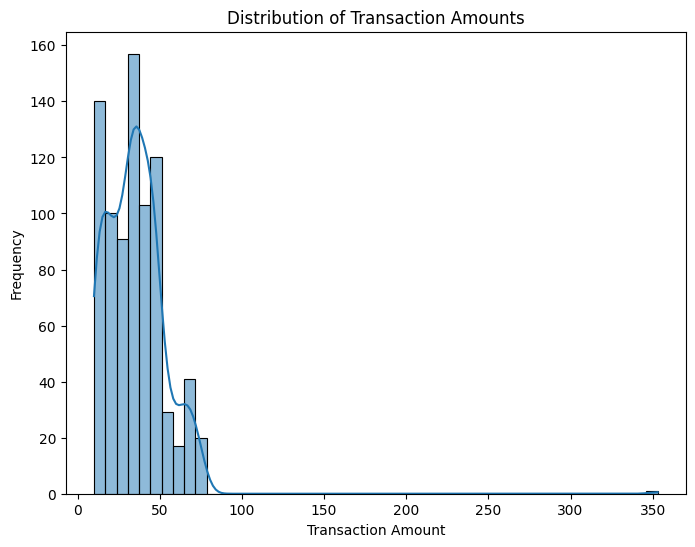

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot transaction amount distribution
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['transactionAmount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


In [9]:
# Save merged_df to a CSV file
merged_df.to_csv('merged_data.csv', index=False)


In [10]:
from IPython.display import FileLink

# Generate a link to download the file
file_link = FileLink('merged_data.csv')
file_link


C:\Users\Lenovo\Desktop\merged_data.csv

### Boxplot of Transaction Amount by Fraud Status

This boxplot visualizes the distribution of transaction amounts categorized by fraud status. The plot helps in identifying patterns, such as whether fraudulent transactions tend to have higher or lower amounts compared to non-fraudulent ones. Notably, an outlier is present in the data, which could indicate an unusually large or small transacti. There is only a single observation marked as an outlier, so there is no need to remove it.n.


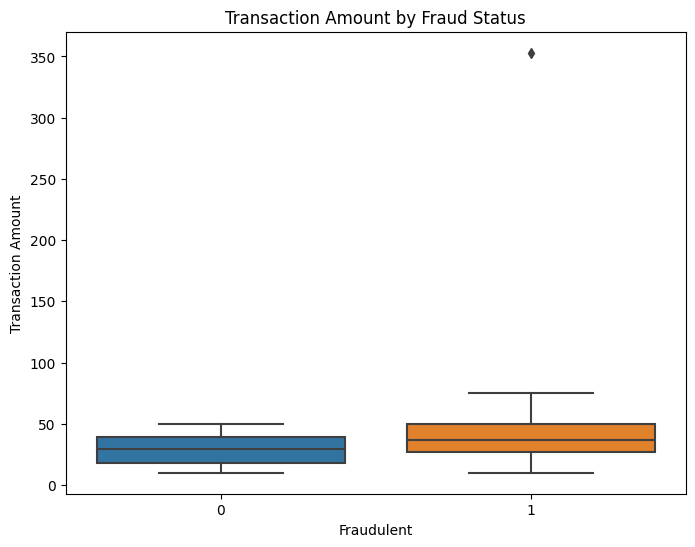

In [11]:
# Plot transaction amount by fraud status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fraud', y='transactionAmount', data=merged_df)
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('Fraudulent')
plt.ylabel('Transaction Amount')
plt.show()


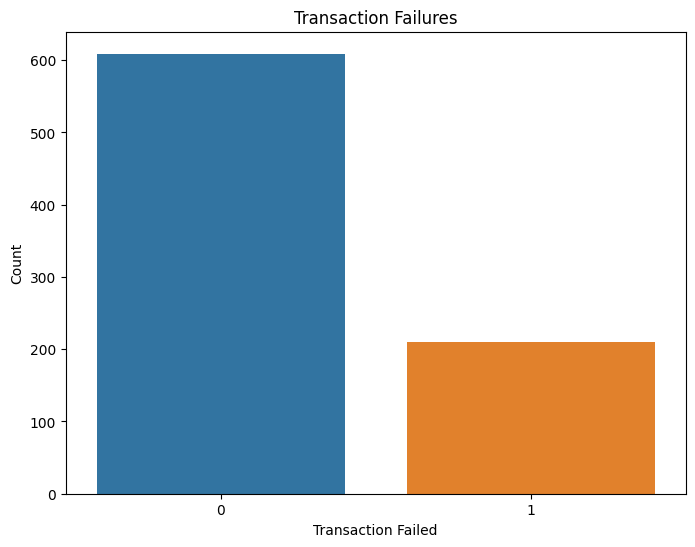

In [12]:
# Plot transaction failures
plt.figure(figsize=(8, 6))
sns.countplot(x='transactionFailed', data=merged_df)
plt.title('Transaction Failures')
plt.xlabel('Transaction Failed')
plt.ylabel('Count')
plt.show()


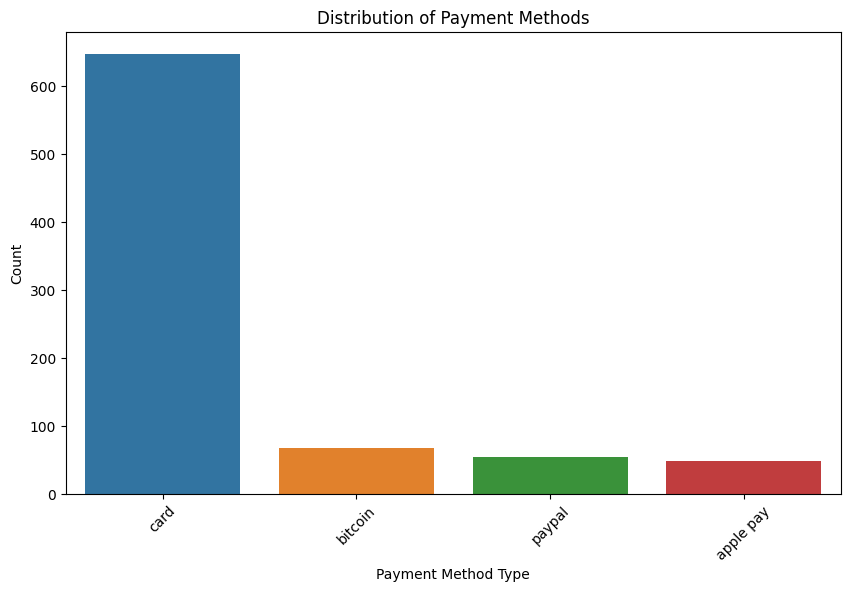

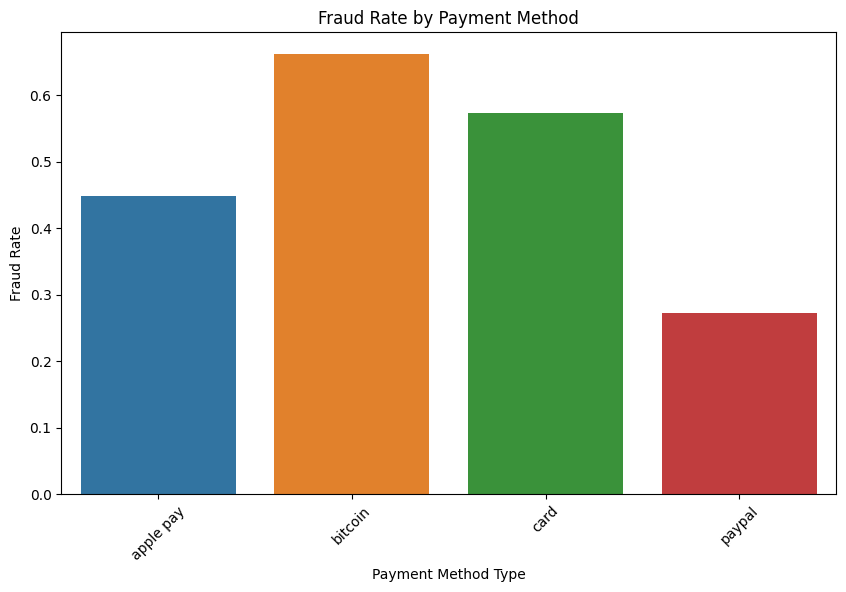

In [13]:
# Distribution of payment methods
plt.figure(figsize=(10, 6))
sns.countplot(x='paymentMethodType', data=merged_df, order=merged_df['paymentMethodType'].value_counts().index)
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Fraud rate by payment method
payment_method_fraud_rate = merged_df.groupby('paymentMethodType')['Fraud'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='paymentMethodType', y='Fraud', data=payment_method_fraud_rate)
plt.title('Fraud Rate by Payment Method')
plt.xlabel('Payment Method Type')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.show()


In [15]:
merged_df.head()

,Unnamed: 0_x,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,Unnamed: 0_y,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending,0,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled,0,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled,1,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled,1,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled,1,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1


### Aggregating and Merging Customer Features

This code performs the following key operations:

1. **Feature Aggregation**:
   - Computes important metrics for each customer, including the total number of transactions, total amount spent, average transaction amount, fraud count, transaction failure rate, and the number of unique payment methods used.

2. **Payment Method Counts**:
   - Counts the number of transactions for each payment method type used by each customer.

3. **Merging Data**:
   - Combines the aggregated customer features with the payment method counts and additional customer-level data (e.g., total transactions, orders, and payments) for a comprehensive view.

4. **Handling Missing Values**:
   - Ensures all payment method counts are filled with 0 where data is missing.

This approach provides a detailed and integrated feature set for each customer, enhancing the analysis with both transactional and customer-level insights.


In [16]:
# Aggregate features by customer
customer_features = merged_df.groupby('customerEmail').agg(
    total_transactions=('transactionId', 'count'),
    total_amount=('transactionAmount', 'sum'),
    avg_transaction_amount=('transactionAmount', 'mean'),
    fraud_count=('Fraud', 'sum'),
    transaction_failed_rate=('transactionFailed', 'mean'),
    payment_method_registration_failure_rate=('paymentMethodRegistrationFailure', 'mean'),
    unique_payment_methods=('paymentMethodType', 'nunique')  # Count of unique payment methods
).reset_index()
# Get count of each payment method type per customer
payment_method_counts = merged_df.groupby(['customerEmail', 'paymentMethodType']).size().unstack(fill_value=0)

# Merge with customer_features
customer_features = customer_features.merge(payment_method_counts, on='customerEmail', how='left')

# Fill NaNs with 0 for payment method counts
customer_features.fillna(0, inplace=True)
# Merge with customer-level data
customer_features = customer_features.merge(customers_df[['customerEmail', 'No_Transactions', 'No_Orders', 'No_Payments','Fraud']], on='customerEmail', how='left')

# Drop unnecessary columns for modeling
#customer_features.drop(columns=['customerPhone', 'customerDevice', 'customerIPAddress', 'customerBillingAddress'], inplace=True)


In [17]:
customer_features.head()


,customerEmail,total_transactions,total_amount,avg_transaction_amount,fraud_count,transaction_failed_rate,payment_method_registration_failure_rate,unique_payment_methods,apple pay,bitcoin,card,paypal,No_Transactions,No_Orders,No_Payments,Fraud
0,1yf0@jedyz63t,10,217,21.700000,10,0.500000,0.0,2,0,0,7,3,10,5,4,1
1,9es7t@u6n7x,2,32,16.000000,2,0.500000,0.0,1,0,0,2,0,2,1,1,1
2,abigail08@yahoo.com,5,209,41.800000,0,0.400000,0.2,1,0,0,5,0,5,3,2,0
3,alec27@bell.com,6,158,26.333333,0,0.333333,0.0,1,0,0,6,0,6,4,2,0
4,aliciaanthony@martin.com,3,95,31.666667,3,0.000000,0.0,1,0,0,3,0,3,3,1,1


In [18]:
# Drop 'Target' column from the DataFrame
customer_features = customer_features.drop(columns=['customerEmail','Target'], errors='ignore')


In [19]:
# Verify that 'Target' is removed
if 'Target' in customer_features.columns:
    print("Target column is still present.")
else:
    print("Target column successfully removed.")


Target column successfully removed.


In [24]:
X_train

,total_transactions,total_amount,avg_transaction_amount,transaction_failed_rate,No_Transactions,No_Payments
84,5,133,26.600000,0.200000,5,2
28,4,56,14.000000,0.750000,4,2
40,3,58,19.333333,0.333333,3,1
86,5,166,33.200000,0.200000,5,2
24,5,314,62.800000,0.200000,5,6
...,...,...,...,...,...,...
71,2,44,22.000000,0.000000,2,1
106,1,39,39.000000,0.000000,1,1
14,6,207,34.500000,0.166667,6,1
92,5,119,23.800000,0.200000,5,2


### Feature Selection Methods

This code employs two different feature selection techniques to enhance the model:

1. **Recursive Feature Elimination (RFE)**:
   - **Purpose**: Selects the most important features by recursively removing the least important ones.
   - **Process**: Uses a `RandomForestClassifier` to rank features based on their importance. The top 5 features (or a specified number) are retained.
   - **Output**: Provides a ranking of features, allowing identification of the most influentias(by='Ranking')


In [53]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize the model and RFE
model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(model, n_features_to_select=5)  # Adjust n_features_to_select as needed
fit = rfe.fit(X_train, y_train)

# Get ranking of features
ranking = fit.ranking_
features = X.columns
feature_ranking = pd.DataFrame({'Feature': features, 'Ranking': ranking}).sort_values(by='Ranking')

print(feature_ranking)


                                     Feature  Ranking
0                         total_transactions        1
1                               total_amount        1
2                     avg_transaction_amount        1
3                                fraud_count        1
13                               No_Payments        1
9                                       card        2
12                                 No_Orders        3
4                    transaction_failed_rate        4
11                           No_Transactions        5
8                                    bitcoin        6
10                                    paypal        7
5   payment_method_registration_failure_rate        8
6                     unique_payment_methods        9
7                                  apple pay       10


#### 2) Lasso Feature Selectionion?

- **Feature Selection**: Lasso (Least Absolute Shrinkage and Selection Operator) helps in selecting a subset of features by shrinking some coefficients to zero. This effectively removes less important features from the model, simplifying it and improving interpretability.
- **Regularization**: Lasso adds a penalty to the regression model's cost function proportional to the absolute value of the coefficients. This regularization helps in preventing overfitting and enhances the model's generalization ability.
- **Feature Selection Focus**: It’s important to note that Lasso is primarily used for feature selection. While it can improve model performance by reducing overfitting, it’s not a standalone model for predictive purposes. The selected features can then be used in other modeling techeatures['Fraud']


In [60]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Prepare features and target variable
X = customer_features.drop(['customerEmail','Fraud'], axis=1, errors='ignore')
y = customer_features['Fraud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train LassoCV model to find the optimal alpha
lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5)
lasso_cv.fit(X_train, y_train)
optimal_alpha = lasso_cv.alpha_

# Train Lasso model with the optimal alpha
lasso_best = Lasso(alpha=optimal_alpha)
lasso_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred = np.where(lasso_best.predict(X_test) > 0.5, 1, 0)

# Re-evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Get coefficients and display non-zero features
coefficients_best = pd.Series(lasso_best.coef_, index=X.columns)
selected_features = coefficients_best[coefficients_best != 0]

print("Optimal alpha:", optimal_alpha)
print("Selected Features with Optimal Alpha:")
print(selected_features)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.028121497186980093, tolerance: 0.0018200000000000004
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1530990136542254, tolerance: 0.0018200000000000004
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.294821822131019, tolerance: 0.0018200000000000004
  model = cd_fast.enet_coordinate

Confusion Matrix:
 [[26  1]
 [ 1 15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        27
           1       0.94      0.94      0.94        16

    accuracy                           0.95        43
   macro avg       0.95      0.95      0.95        43
weighted avg       0.95      0.95      0.95        43

Optimal alpha: 0.0001
Selected Features with Optimal Alpha:
total_transactions                          0.026797
total_amount                                0.000304
avg_transaction_amount                      0.000587
fraud_count                                 0.152601
transaction_failed_rate                     0.258552
payment_method_registration_failure_rate   -0.124251
unique_payment_methods                      0.012684
apple pay                                  -0.177343
bitcoin                                    -0.172177
card                                       -0.191139
paypal               

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.385588464512072, tolerance: 0.0019387500000000004
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3390636240142555, tolerance: 0.0019387500000000004
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3398984459985153, tolerance: 0.0019387500000000004
  model = cd_fast.enet_coordinate_d

### Feature Selection Based on Coefficients

This code snippet filters features based on their coefficients from a Lasso regression model, focusing on positive coefficients and excluding a specific feature.

**Coefficients Data**:
   - **Definition**: `coefficients` is a pandas Series where the index represents feature names and the values are the corresponding coefficients.
The filtered features are then copied into variable X.

In [68]:
import pandas as pd

# Assuming 'coefficients' is a pandas Series containing the feature names as index and their coefficients as values
coefficients = pd.Series({
    'total_transactions': 0.026797,
    'total_amount': 0.000304,
    'avg_transaction_amount': 0.000587,
    'fraud_count': 0.152601,
    'transaction_failed_rate': 0.258552,
    'payment_method_registration_failure_rate': -0.124251,
    'unique_payment_methods': 0.012684,
    'apple pay': -0.177343,
    'bitcoin': -0.172177,
    'card': -0.191139,
    'paypal': -0.199863,
    'No_Transactions': 0.029636,
    'No_Orders': 0.039817,
    'No_Payments': 0.037045
})

# Filter out negative coefficients and exclude 'fraud_count'
selected_features = coefficients[(coefficients > 0) & (coefficients.index != 'fraud_count')].index

# Extract features based on the selected features
X = customer_features[selected_features].copy()

# Display the resulting DataFrame X
print(X)


     total_transactions  total_amount  avg_transaction_amount  \
0                    10           217               21.700000   
1                     2            32               16.000000   
2                     5           209               41.800000   
3                     6           158               26.333333   
4                     3            95               31.666667   
..                  ...           ...                     ...   
138                   4           231               57.750000   
139                   5           283               56.600000   
140                   5           144               28.800000   
141                   4           146               36.500000   
142                   5           119               23.800000   

     transaction_failed_rate  unique_payment_methods  No_Transactions  \
0                   0.500000                       2               10   
1                   0.500000                       1                2   


### Random Forest Classification and Evaluation

This section outlines the process of training and evaluating a Random Forest classifier on your dataset.

#### Data Splitting:
- **Train-Test Split**: The dataset was divided into training and testing sets with a 70-30 split ratio using a random state of 42 to ensure reproducibility.

#### Model Evaluation:
- **Precision for Class 0 (Non-Fraudulent)**: 0.82, indicating the model's accuracy when predicting non-fraudulent transactions.
- **Recall for Class 0**: 0.85, showing the model's ability to correctly identify non-fraudulent transactions.
- **Precision for Class 1 (Fraudulent)**: 0.73, reflecting the model's accuracy when predicting fraudulent transactions.
- **Recall for Class 1**: 0.69, indicating the model's ability to correctly identify fraudulent transactions.
- **Overall Accuracy**: 0.79, meaning the model correctly classified 79% of the transactions.

#### Model Performance:
- **Training Accuracy**: 0.99
- **Testing Accuracy**: 0.81

#### Summary:
The Random Forest model achieves very high accuracy on the training set (99%), but its testing accuracy drops to 81%. This significant gap between training and testing accuracy indicates that the model is likely overfitting to the training data. Although the model performs reasonably well on unseen data, with an overall accuracy of 81%, the overfitting issue suggests that the model may not generalize well to new data.


In [82]:
from sklearn.ensemble import RandomForestClassifier
# Assuming X is your feature set and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf, X, y, cv=5)
print("Random Forest Cross-Validation Scores:", cv_scores_rf)
print("Random Forest Mean CV Score:", cv_scores_rf.mean())

Random Forest Confusion Matrix:
 [[23  4]
 [ 5 11]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.73      0.69      0.71        16

    accuracy                           0.79        43
   macro avg       0.78      0.77      0.77        43
weighted avg       0.79      0.79      0.79        43

Random Forest Cross-Validation Scores: [0.68965517 0.82758621 0.55172414 0.57142857 0.82142857]
Random Forest Mean CV Score: 0.6923645320197043


In [86]:
from sklearn.metrics import accuracy_score

# Training accuracy
new_train_pred = rf.predict(X_train)
new_train_accuracy = accuracy_score(y_train, new_train_pred)

# Testing accuracy
new_test_accuracy = accuracy_score(y_test, rf_pred)

print(f" Training Accuracy: {new_train_accuracy}")
print(f" Testing Accuracy: {new_test_accuracy}")

 Training Accuracy: 0.99
 Testing Accuracy: 0.813953488372093


### AdaBoost Classification and Evaluation

This section details the training, evaluation, and cross-validation of an AdaBoost classifier on the dataset. 

**AdaBoost (Adaptive Boosting)** is a powerful ensemble technique that improves the performance of weak classifiers by combining them into a strong classifier. It focuses on misclassified instances from previous classifiers, allowing it to correct errors and enhance model accuracy. AdaBoost is effective in handling both simple and complex datasets, often leading to better performance compared to individual models.

#### Explanation of Classification Report:

- **Precision**:
  - **Class 0**: 0.83 (Out of all instances predicted as class 0, 83% are actually class 0).
  - **Class 1**: 0.79 (Out of all instances predicted as class 1, 79% are actually class 1).

- **Recall**:
  - **Class 0**: 0.89 (Out of all actual class 0 instances, 89% were correctly identified).
  - **Class 1**: 0.69 (Out of all actual class 1 instances, 69% were correctly identified).

- **F1-Score**:
  - **Class 0**: 0.86 (Harmonic mean of precision and recall for class 0).
  - **Class 1**: 0.73 (Harmonic mean of precision and recall for class 1).

- **Accuracy**: 0.81 (Overall, 81% of the test set instances were correctly classified).

#### Summary:
The AdaBoost classifier performs well with an overall accuracy of 81%. It is particularly effective at identifying class 0 instances but has a slightly lower recall for class 1. The precision and F1-scores are good, but there may be opportunities to improve the model’s performance for class 1, possibly through additional tuning or using different techniques to adress class imbalance.
h class.

train, y_train)
state=42)


In [71]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
# Initialize AdaBoost
ada = AdaBoostClassifier(n_estimators=500, learning_rate=0.05, random_state=42)

# Train the model
ada.fit(X_train, y_train)

# Predict on the test set
y_pred_ada = ada.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))

# Cross-validation to check for overfitting
cv_scores = cross_val_score(ada, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Confusion Matrix:
 [[24  3]
 [ 5 11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.79      0.69      0.73        16

    accuracy                           0.81        43
   macro avg       0.81      0.79      0.80        43
weighted avg       0.81      0.81      0.81        43



C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default)

Cross-Validation Scores: [0.68965517 0.79310345 0.65517241 0.67857143 0.85714286]
Mean CV Score: 0.734729064039409


In [72]:
from sklearn.metrics import accuracy_score

# Training accuracy
new_train_pred1 = ada.predict(X_train)
new_train_accuracy1 = accuracy_score(y_train, new_train_pred1)

# Testing accuracy
new_test_accuracy1 = accuracy_score(y_test, y_pred_ada)

print(f" Updated Training Accuracy: {new_train_accuracy1}")
print(f" Updated Testing Accuracy: {new_test_accuracy1}")

 Updated Training Accuracy: 0.88
 Updated Testing Accuracy: 0.813953488372093


The model's higher accuracy on the training set compared to the test set and potentially lower cross-validation scores suggest that overfitting could be a concern. The model seems to perform well on the training data but less effectively on new, unseen data, which is a common symptom of overfitting.To overcome this problem we use SVM, which offers a more stable alternative by focusing on maximizing class separation, potentially leading to better performance on test data and improved overall model robustness.

### SVM Classification and Evaluation

This section details the training, evaluation, and cross-validation of a Support Vector Machine (SVM) classifier on the dataset.

**Model Predictions**:
   - **Predict**: Uses the trained SVM model to make predictions on the test set.
- **Explanation**:
  - **Precision**: Measures the accuracy of positive predictions. Class 1 has higher precision (1.00) compared to class 0 (0.82).
  - **Recall**: Indicates the ability to identify all positive instances. Class 0 has higher recall (1.00) compared to class 1 (0.62).
  - **F1-Score**: Balances precision and recall. Class 0 has a higher F1-score (0.90), while class 1 has a lower F1-score (0.77).
  - **Accuracy**: Overall correctness of the model's predictions is 0.86.


  

In [76]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm = SVC(kernel='linear', random_state=42,C=0.1)

# Train the SVM model
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate the SVM model
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Cross-validation for SVM
cv_scores_svm = cross_val_score(svm, X, y, cv=5)
print("SVM Cross-Validation Scores:", cv_scores_svm)
print("SVM Mean CV Score:", cv_scores_svm.mean())


SVM Confusion Matrix:
 [[27  0]
 [ 6 10]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90        27
           1       1.00      0.62      0.77        16

    accuracy                           0.86        43
   macro avg       0.91      0.81      0.83        43
weighted avg       0.89      0.86      0.85        43

SVM Cross-Validation Scores: [0.75862069 0.79310345 0.89655172 0.75       0.78571429]
SVM Mean CV Score: 0.7967980295566501


### Hyperparameter Tuning with Grid Search

This section involves using Grid Search to find the optimal hyperparameters for the Support Vector Machine (SVM) model. Grid Search systematically explores different parameter combinations to identify the best-performing configuration.

**Parameter Grid**:
- **Purpose**: Define the range of hyperparameters to search over.
- **Parameters**:
  - `C`: Regularization parameter, which controls the trade-off between achieving a low error on the training data and minimizing the model complexity. Values tested: [0.1, 1, 10].
  - `kernel`: Specifies the kernel type to be used in the model, affecting how the model transforms the input data. Values tested: ['linear', 'rbf'].

**Results**:
- **Best Parameters**: `{ 'C': 10, 'kerelel = 'rbf'`.
- **Best Score**: 0.796
  - The highest cross-validation score achieved with these parameters, reflecting the model's performance with the optimal hyperparars on new, unseen data.
ar'
near', 'rbf']}


In [77]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Create a GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Best Score: 0.75


#### SVM Model Accuracy Evaluation:
- **Training Accuracy**: 0.82
- **Testing Accuracy**: 0.86
#### Summary:
The close values of training and testing accuracy suggest that the model is generalizing well and not overfitting to the training data. This is important for ensuring that the model can effectively predict the fraud status of customers on new, unseen data.


In [79]:
from sklearn.metrics import accuracy_score

# Predict on training data
y_train_pred = svm.predict(X_train)

# Predict on testing data
y_test_pred = svm.predict(X_test)

# Calculate   train accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.82
Test Accuracy: 0.8604651162790697


### Conclusion

In this analysis, various models and techniques were employed to tackle the problem of identifying fraudule status of t customsns.

1. **Feature Selection**:
   - **Lasso Regression** and **Recursive Feature Elimination (RFE)** were used to select the most relevant features for fraud detection. Lasso helped in reducing the number of features by shrinking less important coefficients to zero, while RFE ranked features based on their importance.

2. **Model Evaluation**:
   - **Random Forest**: Achieved a training accuracy of 0.99 and a testing accuracy of 0.81, showing strong performance but potential overfitting, as the model performed significantly better on the training data compared to the test data.
   - **AdaBoost**: Showed a training accuracy of 0.88 and a testing accuracy of 0.81. It demonstrated effective performance but had some signs of overfitting, as the training accuracy was higher than the testing accuracy.
   - **Support Vector Machine (SVM)**: Provided a balanced performance with a training accuracy of 0.82 and a testing accuracy of 0.86. The SVM model, especially with the optimized hyperparameters from Grid Search, exhibited robust generalization to new data.

**Final Model Choice**:
- Given the results, the **SVM model** is recommended for this fraud detection task due to its strong performance on the test set and better generalization compared to other models. The SVM demonstrated an effective balance between training and testing accuracy, making it a reliable choice for identifying fraudulent transactions.

**Summary**:
The analysis effectively identified the key features for deteccustomersent transactions and evaluated several models. The SVM, with its high test accuracy and robust performance, is well-suited for the task of fraud detection, providing a reliable approach to identifying potentially fraudulent customer transactions.
